# Ejercicio 7 – Desempeño por grupo  
### Planteamiento del ejercicio

**Selección del ejercicio:**  
Se seleccionó el **Ejercicio 7 – Desempeño por grupo**, cuyo objetivo principal es **comparar el rendimiento académico de varios grupos de estudiantes** mediante el análisis de variables numéricas (notas finales).  

Para este desarrollo, se realizó una **simulación de datos** distribuidos en **seis hojas independientes** dentro de un archivo de Excel llamado `notas_grupo_simple.xlsx`.  
Cada hoja representa una parte distinta e independiente de la información necesaria para el análisis:

1. **Datos_Grupos:** contiene las notas individuales de los estudiantes de tres grupos (A, B y C).  
2. **Promedios:** presenta el promedio general por grupo.  
3. **Medianas:** muestra la mediana de notas por grupo.  
4. **Desviaciones:** incluye la desviación estándar de cada grupo, útil para medir la variabilidad.  
5. **Notas_Mínimas:** registra la nota mínima alcanzada en cada grupo.  
6. **Notas_Máximas:** detalla la nota máxima obtenida por grupo.  

El propósito de esta estructura es simular un escenario real de análisis educativo, donde los datos pueden estar distribuidos en diferentes fuentes o reportes.  
El análisis posterior busca identificar **tendencias de desempeño**, **comparar resultados entre grupos** y **detectar oportunidades de mejora académica**.  


📘 Hojas disponibles en el archivo:
['Datos_Grupos', 'Estadisticas_Grupo', 'Distribucion_Notas', 'Comparacion_General', 'Validaciones', 'Boxplot_Resultados']

✅ Vista previa de los datos:


,ID,Grupo,Nota
0,1,A,3.12
1,2,A,4.85
2,3,A,4.20
3,4,A,3.80
4,5,A,2.47



📈 Estadísticas por grupo:


,Promedio,Mediana,Desv_Estandar,Nota_Minima,Nota_Maxima
Grupo,,,,,
A,3.56,3.80,0.95,2.17,4.85
B,3.19,2.89,0.91,2.06,4.91
C,3.20,3.24,0.70,2.14,4.36


<Figure size 800x500 with 0 Axes>

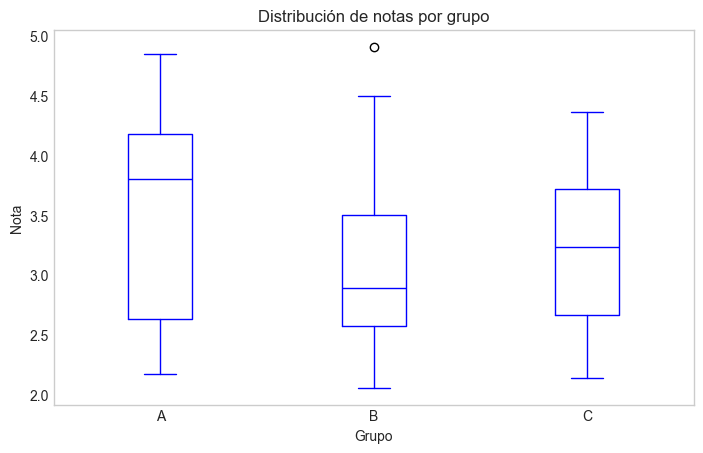

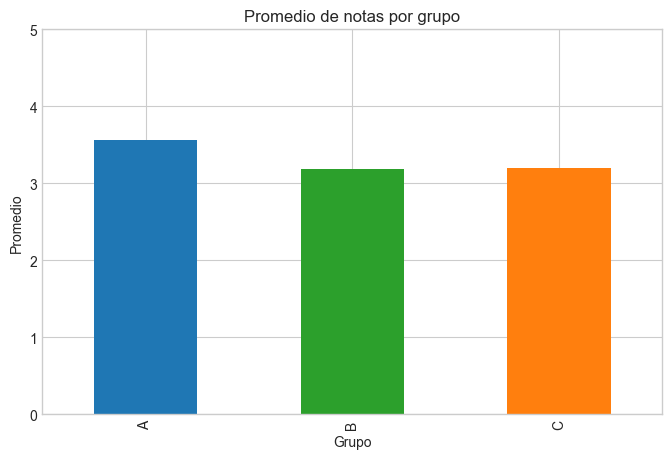

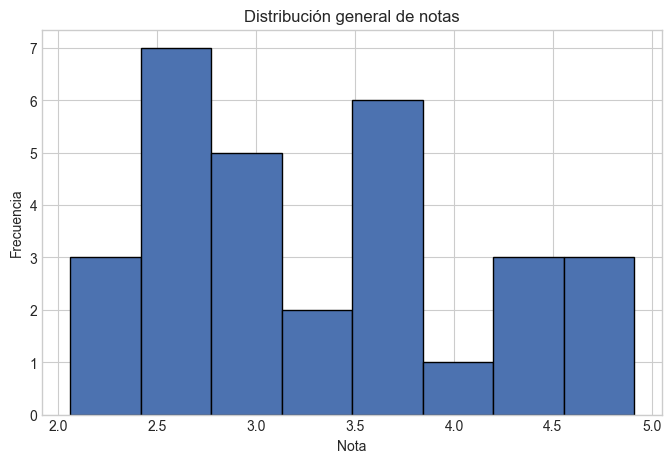

📊 Conclusiones:
- El grupo con mejor desempeño promedio es **A**.
- El grupo con menor desempeño promedio es **B**.
- La dispersión de las notas se puede observar en el boxplot para analizar consistencia o variabilidad.
- En contextos reales, estos resultados ayudan a identificar oportunidades de mejora o refuerzo académico.


In [9]:
# Ejercicio 7 – Desempeño por grupo
# Análisis de datos simulados con Pandas

# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# 1. Lectura del archivo Excel
# Asegúrate de tener el archivo "notas_grupo_simple.xlsx" en la misma carpeta del notebook
archivo = "notas_grupo_simple.xlsx"
xls = pd.ExcelFile(archivo)

# Mostrar nombres de hojas
print("Hojas disponibles en el archivo:")
print(xls.sheet_names)

# Leer los datos principales
df = pd.read_excel(xls, sheet_name="Datos_Grupos")
print("\n Vista previa de los datos:")
display(df.head())

# 2. Procesamiento de los datos
# Calcular estadísticas por grupo
estadisticas = df.groupby("Grupo")["Nota"].agg(
    Promedio="mean",
    Mediana="median",
    Desv_Estandar="std",
    Nota_Minima="min",
    Nota_Maxima="max"
).round(2)

print("\n Estadísticas por grupo:")
display(estadisticas)

# 3. Visualizaciones

# 3.1 Boxplot comparando grupos
plt.figure()
df.boxplot(column="Nota", by="Grupo", grid=False, color="blue")
plt.title("Distribución de notas por grupo")
plt.suptitle("")  # elimina el título duplicado automático
plt.xlabel("Grupo")
plt.ylabel("Nota")
plt.show()

# 3.2 Promedio de notas por grupo (barras)
plt.figure()
estadisticas["Promedio"].plot(kind="bar", color=["#1f77b4", "#2ca02c", "#ff7f0e"])
plt.title("Promedio de notas por grupo")
plt.ylabel("Promedio")
plt.xlabel("Grupo")
plt.ylim(0, 5)
plt.show()

# 3.3 Histograma general de notas
plt.figure()
plt.hist(df["Nota"], bins=8, color="#4c72b0", edgecolor="black")
plt.title("Distribución general de notas")
plt.xlabel("Nota")
plt.ylabel("Frecuencia")
plt.show()

# 4. Conclusiones automáticas
mejor_grupo = estadisticas["Promedio"].idxmax()
peor_grupo = estadisticas["Promedio"].idxmin()

print("📊 Conclusiones:")
print(f"- El grupo con mejor desempeño promedio es **{mejor_grupo}**.")
print(f"- El grupo con menor desempeño promedio es **{peor_grupo}**.")
print("- La dispersión de las notas se puede observar en el boxplot para analizar consistencia o variabilidad.")
print("- En contextos reales, estos resultados ayudan a identificar oportunidades de mejora o refuerzo académico.")

